In [1]:
# results에서 불러오기
import os

pathlist = os.listdir('./results')


In [2]:
path_weather = [dirs for dirs in pathlist if "weather" in dirs]
path_weather

["weather_192_96_iTransformer_custom_MS_ft192_sl48_ll96_pl1024_dm8_nh4_el1_dl1024_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_192_96_iTransformer_TCN_custom_MS_ft192_sl48_ll96_pl1024_dm8_nh3_el1_dl1024_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_336_336_iTransformer_custom_M_ft336_sl48_ll336_pl512_dm8_nh3_el1_dl512_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_336_336_iTransformer_TCN_custom_M_ft336_sl48_ll336_pl128_dm8_nh2_el1_dl128_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_336_336_iTransformer_TCN_custom_M_ft336_sl48_ll336_pl256_dm8_nh3_el1_dl256_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_720_360_iTransformer_TCN_custom_M_ft720_sl48_ll360_pl64_dm8_nh4_el1_dl64_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_720_360_noTCN_iTransformer_custom_M_ft720_sl48_ll360_pl64_dm8_nh4_el1_dl64_df1_fctimeF_ebTrue_dt'Exp'_projection_0",
 "weather_720_360_rework_iTransformer_TCN_custom_M_ft720_sl48_ll360_pl64_dm8_nh4_el1_dl64_df1_fctimeF_ebTrue_dt'Exp'_pr

In [3]:
import numpy as np

load_files = ['metrics.npy', 'metrics_last.npy', 'pred.npy', 'true.npy']

file_path = './results/' + path_weather[-2] + '/'

pred_obj = np.load(file_path + 'pred.npy')
true_obj = np.load(file_path + 'true.npy')

In [4]:
pred_obj.shape, true_obj.shape # 시계열 96, 22차원, 10444 시도

((10444, 96, 21), (10444, 96, 21))

In [5]:
import matplotlib.pyplot as plt

In [6]:
# utils 불러오기
from utils.metrics import metric, REC_CORR, SMAE, RATIO_IRR

In [7]:
# 각 변수별 상관관계 파악
np.corrcoef(pred_obj[0,:,:].T).shape, np.corrcoef(true_obj[0,:,:].T).shape

C:\Users\Yohan\anaconda3\envs\tcitransformer\Lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Yohan\anaconda3\envs\tcitransformer\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


((21, 21), (21, 21))

METRICS 1th var:: MAE- 0.37789520621299744 MSE 0.22422678768634796 CORR -0.8825576176647297 SMAE -0.36079493165016174 IRR(3) 0.0
METRICS 2th var:: MAE- 0.27308958768844604 MSE 0.09312514215707779 CORR 0.8510446414807258 SMAE -0.25940343737602234 IRR(3) 0.0
METRICS 3th var:: MAE- 0.24183504283428192 MSE 0.07372429966926575 CORR 0.8988674600122535 SMAE -0.21772122383117676 IRR(3) 0.0
METRICS 4th var:: MAE- 0.3459983170032501 MSE 0.1527620404958725 CORR -0.761474441968386 SMAE -0.2967374324798584 IRR(3) 0.0
METRICS 5th var:: MAE- 0.34123125672340393 MSE 0.16192518174648285 CORR 0.6404243896323855 SMAE 0.25877946615219116 IRR(3) 0.0
METRICS 6th var:: MAE- 0.15166044235229492 MSE 0.028404483571648598 CORR 0.8490394691951287 SMAE -0.13795766234397888 IRR(3) 0.0
METRICS 7th var:: MAE- 0.23355810344219208 MSE 0.07551030069589615 CORR -0.3142296954921804 SMAE -0.19593799114227295 IRR(3) 0.0
METRICS 8th var:: MAE- 0.072934091091156 MSE 0.008017987944185734 CORR 0.8667082045337562 SMAE -0.0088487

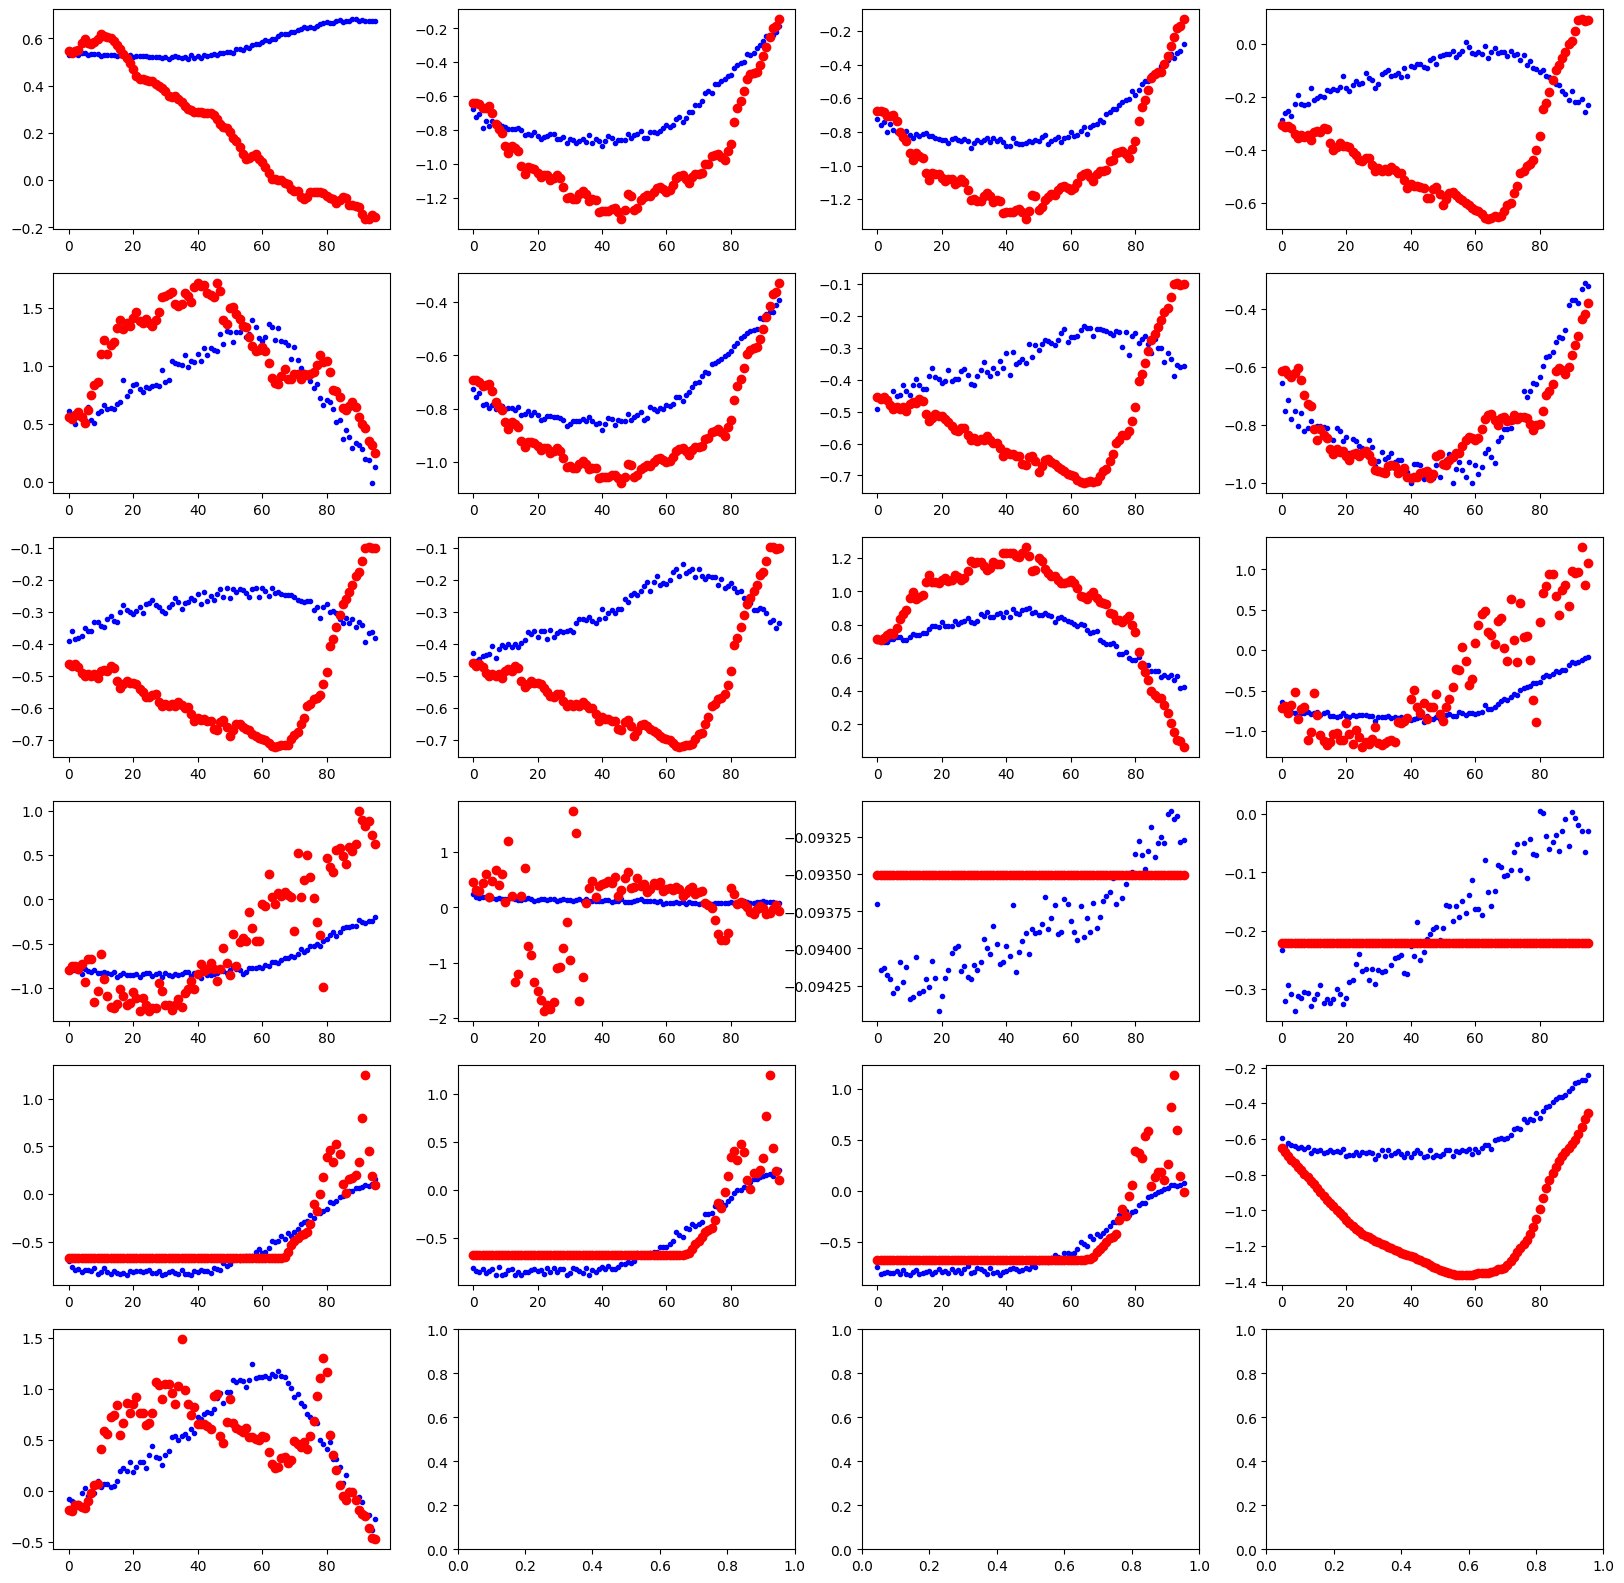

In [8]:
xval = np.array(range(96))

fig, axs = plt.subplots(6, 4, figsize=(20, 20))  # 5행 10열 서브플롯, figure 크기 조정
step = 0

# 변수 22개
for i in range(6):
    for j in range(4):
        if 4*i + j < 21:
            x = range(96)
            y1 = pred_obj[step,:,4*i+j] 
            y2 = true_obj[step,:,4*i+j]
            ax = axs[i,j]
            ax.plot(x,y1, 'b.')
            ax.plot(x,y2 , 'ro')
            print(f"METRICS {4*i+j+1}th var:: MAE- {metric(y1,y2)[0]} MSE {metric(y1,y2)[1]} CORR {np.corrcoef(y1,y2)[0,1]} SMAE {SMAE(y1,y2)} IRR(3) {RATIO_IRR(y1,y2,3)}") 

METRICS 1th var:: MAE- 0.3643319606781006 MSE 0.17521433532238007 CORR -0.29642601008859365 SMAE -0.3643319606781006 IRR(3) 0.0
METRICS 2th var:: MAE- 0.26591846346855164 MSE 0.09571278095245361 CORR 0.8478049347435976 SMAE 0.006241241004317999 IRR(3) 0.0
METRICS 3th var:: MAE- 0.281309574842453 MSE 0.11076430231332779 CORR 0.8383554714655581 SMAE 0.0724291205406189 IRR(3) 0.0
METRICS 4th var:: MAE- 0.41897234320640564 MSE 0.25586816668510437 CORR 0.7596709292963049 SMAE 0.41005003452301025 IRR(3) 0.0
METRICS 5th var:: MAE- 0.5131140947341919 MSE 0.4517458975315094 CORR 0.8012063923843216 SMAE 0.5028161406517029 IRR(3) 0.0
METRICS 6th var:: MAE- 0.22388984262943268 MSE 0.07144445925951004 CORR 0.8403556644036239 SMAE 0.11630398780107498 IRR(3) 0.0
METRICS 7th var:: MAE- 0.24118228256702423 MSE 0.08912605792284012 CORR 0.6950982383165145 SMAE 0.18623103201389313 IRR(3) 0.0
METRICS 8th var:: MAE- 0.19750487804412842 MSE 0.06735614687204361 CORR 0.8320971739837866 SMAE -0.1000628992915153

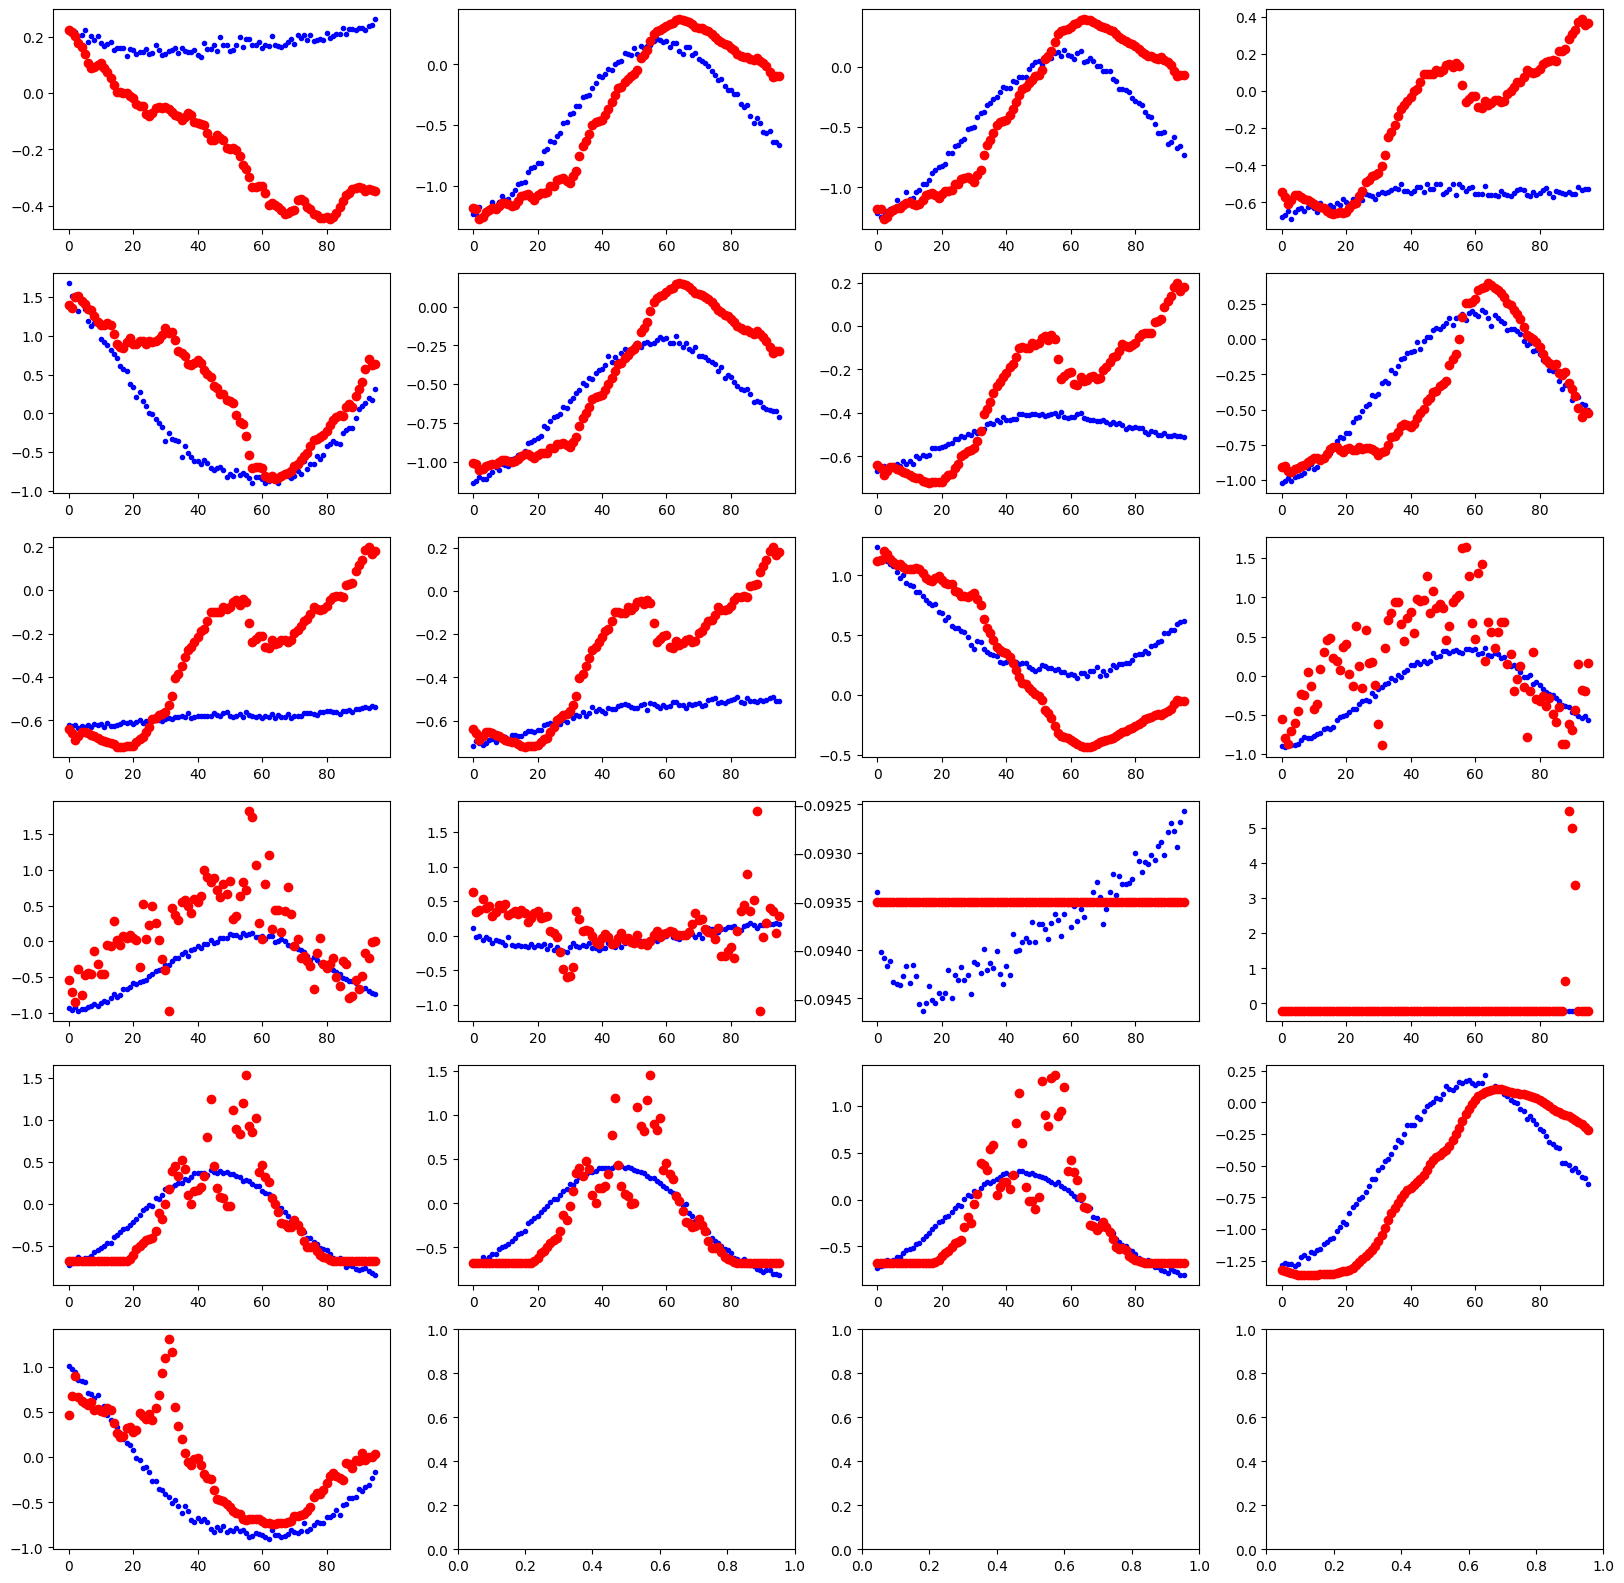

In [9]:
xval = np.array(range(96))

fig, axs = plt.subplots(6, 4, figsize=(20, 20))  # 5행 10열 서브플롯, figure 크기 조정
step = 48

# 변수 22개
for i in range(6):
    for j in range(4):
        if 4*i + j < 21:
            x = range(96)
            y1 = pred_obj[step,:,4*i+j] 
            y2 = true_obj[step,:,4*i+j]
            ax = axs[i,j]
            ax.plot(x,y1, 'b.')
            ax.plot(x,y2 , 'ro')
            print(f"METRICS {4*i+j+1}th var:: MAE- {metric(y1,y2)[0]} MSE {metric(y1,y2)[1]} CORR {np.corrcoef(y1,y2)[0,1]} SMAE {SMAE(y1,y2)} IRR(3) {RATIO_IRR(y1,y2,3)}") 

METRICS 1th var:: MAE- 0.071031354367733 MSE 0.009529518894851208 CORR 0.6288472554482275 SMAE -0.04771089926362038 IRR(3) 0.041666666666666664
METRICS 2th var:: MAE- 0.338385671377182 MSE 0.14808465540409088 CORR 0.8395032059383302 SMAE 0.338385671377182 IRR(3) 0.0
METRICS 3th var:: MAE- 0.3119450807571411 MSE 0.13301317393779755 CORR 0.86524636144625 SMAE 0.30561599135398865 IRR(3) 0.0
METRICS 4th var:: MAE- 0.38003912568092346 MSE 0.18224523961544037 CORR -0.7867993506271374 SMAE 0.18373264372348785 IRR(3) 0.0
METRICS 5th var:: MAE- 0.4253927171230316 MSE 0.25819137692451477 CORR 0.8050768479197494 SMAE -0.20957370102405548 IRR(3) 0.0
METRICS 6th var:: MAE- 0.2544369399547577 MSE 0.08062208443880081 CORR 0.8438324409120784 SMAE 0.2544369399547577 IRR(3) 0.0
METRICS 7th var:: MAE- 0.3490937650203705 MSE 0.16444800794124603 CORR -0.8102441583992399 SMAE 0.23009836673736572 IRR(3) 0.0
METRICS 8th var:: MAE- 0.24216903746128082 MSE 0.09569358825683594 CORR 0.8960240248002909 SMAE 0.2290

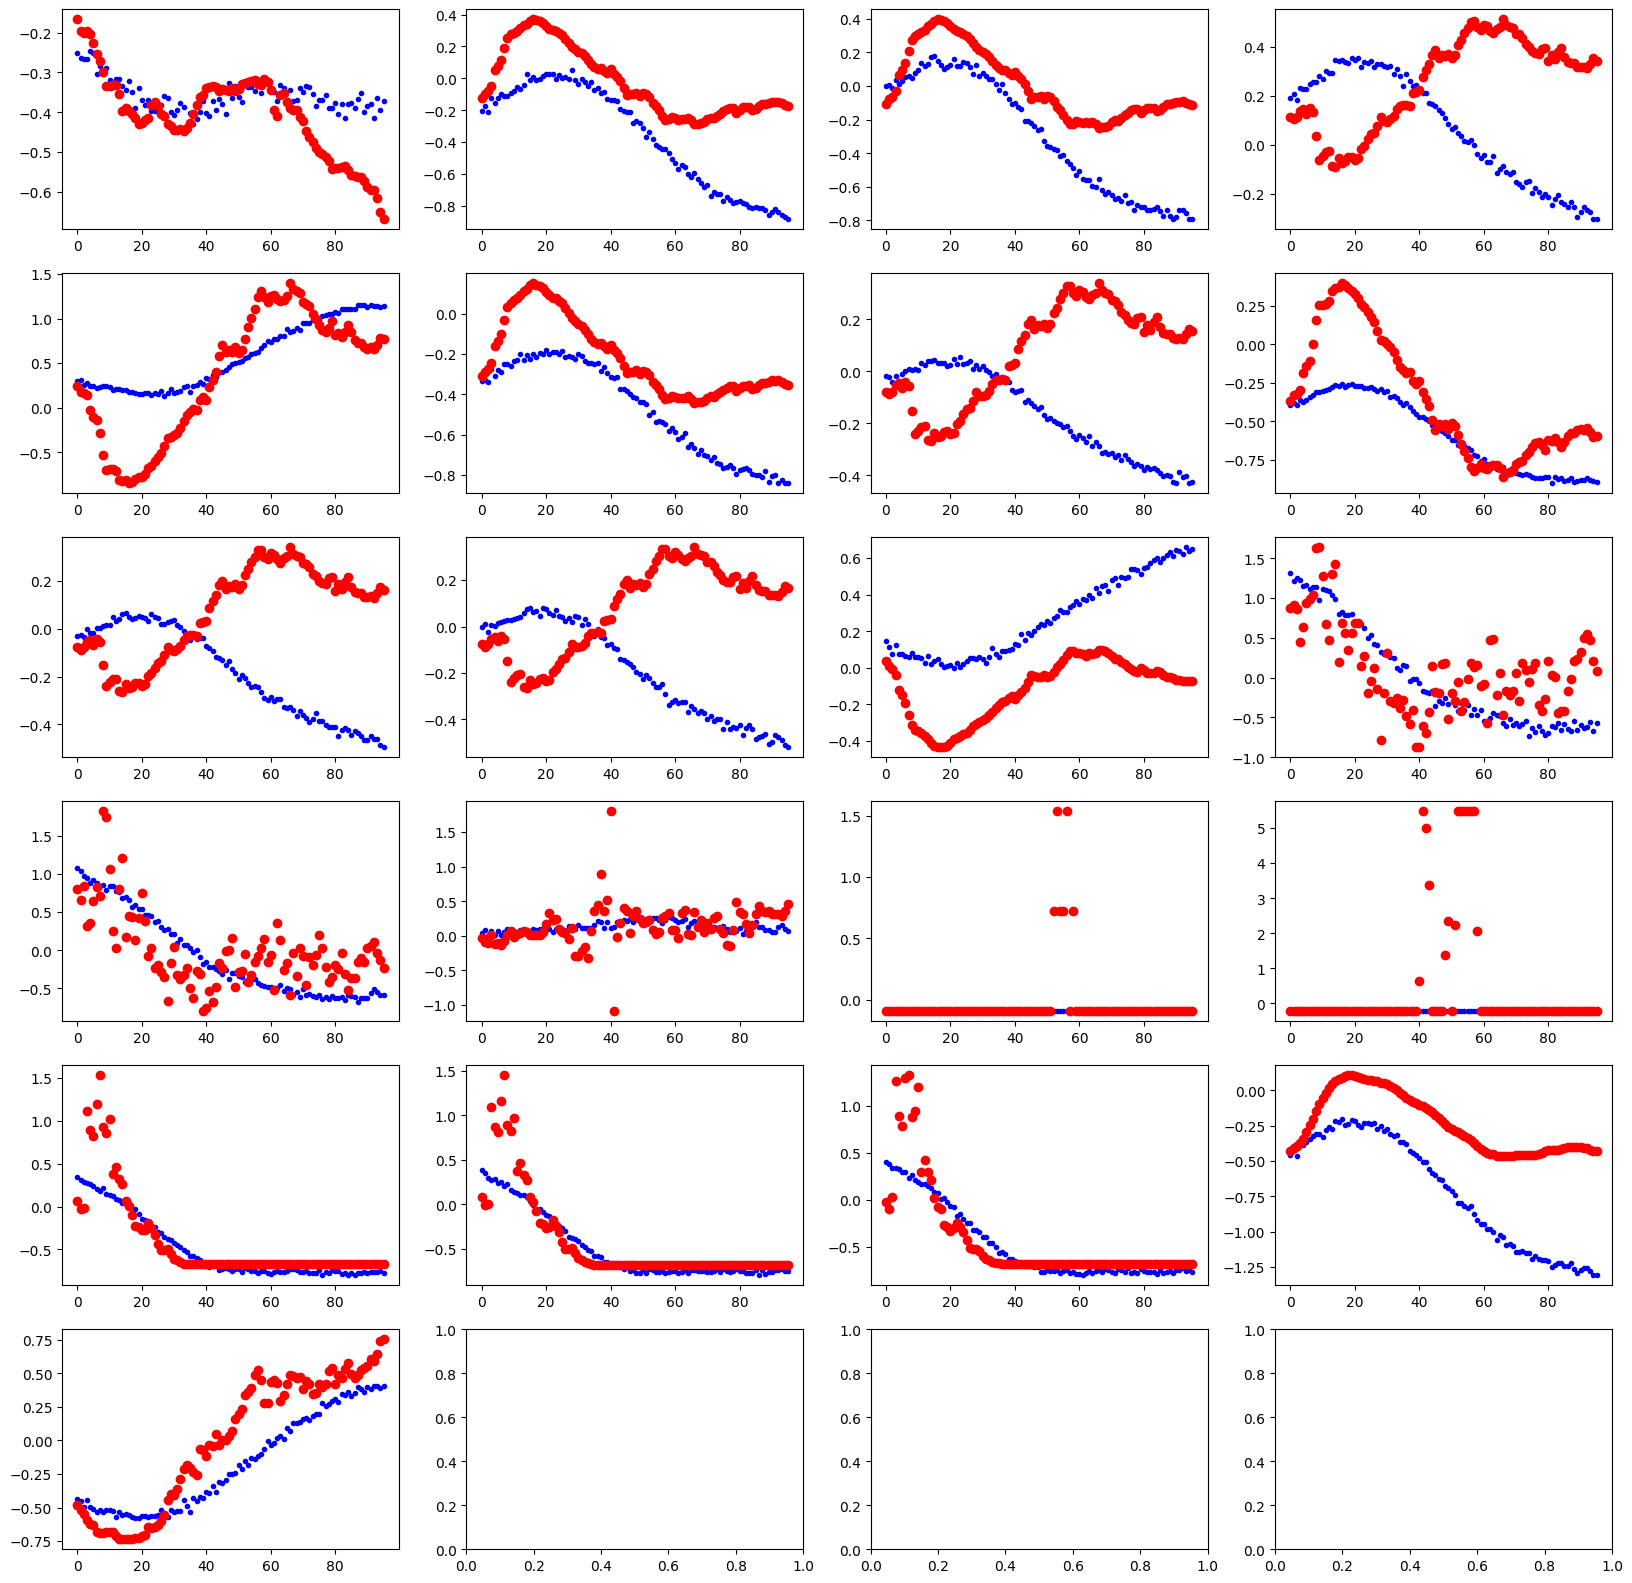

In [10]:
xval = np.array(range(96))

fig, axs = plt.subplots(6, 4, figsize=(20, 20))  # 5행 10열 서브플롯, figure 크기 조정
step = 96

# 변수 22개
for i in range(6):
    for j in range(4):
        if 4*i + j < 21:
            x = range(96)
            y1 = pred_obj[step,:,4*i+j] 
            y2 = true_obj[step,:,4*i+j]
            ax = axs[i,j]
            ax.plot(x,y1, 'b.')
            ax.plot(x,y2 , 'ro')
            print(f"METRICS {4*i+j+1}th var:: MAE- {metric(y1,y2)[0]} MSE {metric(y1,y2)[1]} CORR {np.corrcoef(y1,y2)[0,1]} SMAE {SMAE(y1,y2)} IRR(3) {RATIO_IRR(y1,y2,3)}") 

In [11]:
true_obj[0, 0, :]

array([ 0.5465991 , -0.6398643 , -0.67572546, -0.30697462,  0.5619792 ,
       -0.6935343 , -0.45367682, -0.6148713 , -0.46277624, -0.46122378,
        0.71155715, -0.7129122 , -0.7938599 ,  0.4520802 , -0.09350552,
       -0.22105041, -0.67276675, -0.6794928 , -0.67731243, -0.6482482 ,
       -0.1864404 ], dtype=float32)

In [12]:
# 체크하기 # 시계열 true[s, t, v] = true[s', t' ,v] if s+t = s'+t'
cnt = 0 
for v in range(21):
    for j in range(96):
        for k in range(j):
            if true_obj[0, j, v] != true_obj[k, j-k, v]:
                cnt +=1
print(cnt)

0


In [13]:
# stdev rate 비교, 퍼센타일, 중간값 비교
std_rate_list = []
q3q1_list = []
for c in range(len(pred_obj)):
    std_rate_part = []
    q3q1_list_part = []
    for d in range(21):
        std_rate = np.std(pred_obj[c, :, d])/np.std(true_obj[c, :, d]) if np.std(true_obj[c, :, d]) > 1e-8 else 1e10
        std_rate_part.append(std_rate)
        q3q1_rate = (np.percentile(pred_obj[c, :, d], 75)-np.percentile(pred_obj[c, :, d], 25))/(np.percentile(true_obj[c, :, d], 75)-np.percentile(true_obj[c, :, d], 25)) \
        if (np.percentile(true_obj[c, :, d], 75)-np.percentile(true_obj[c, :, d], 25)) >1e-8 else 1e10
        q3q1_list_part.append(q3q1_rate)
    std_rate_list.append(std_rate_part)
    q3q1_list.append(q3q1_list_part)

std_array = np.array(std_rate_list)
q3q1_array = np.array(q3q1_list)

std_array, q3q1_array

(array([[0.23620801, 0.66953915, 0.55101037, ..., 0.71755815, 0.48565367,
         1.04430056],
        [0.24109243, 0.67632514, 0.55384612, ..., 0.73158449, 0.50184321,
         0.98172456],
        [0.2358831 , 0.68820906, 0.56716388, ..., 0.75056988, 0.55783451,
         0.91427171],
        ...,
        [0.55567497, 0.58979428, 0.67662656, ..., 0.05879303, 0.8964802 ,
         0.13935313],
        [0.54884171, 0.64942509, 0.71018976, ..., 0.04528841, 0.9063499 ,
         0.20729002],
        [0.50660878, 0.60557586, 0.69776398, ..., 0.03739773, 0.97734815,
         0.21464631]]),
 array([[0.2342332 , 0.60314268, 0.48384246, ..., 2.27436429, 0.24669605,
         1.53742526],
        [0.24064169, 0.65587913, 0.52162573, ..., 1.99272161, 0.27821664,
         1.40652054],
        [0.23889558, 0.72501619, 0.59188012, ..., 1.99133085, 0.35505115,
         1.27729031],
        ...,
        [0.64233196, 1.11381404, 1.22806613, ..., 0.09884652, 2.21554023,
         0.12510416],
        [0.6

In [14]:
# 비율 측정
np.sum(std_array>=1)/std_array.size

0.28657146504714487

In [15]:
np.sum(q3q1_array>=1)/q3q1_array.size

0.39382830880341413

In [22]:
np.sum(std_array[:,-1]>=1)/std_array[:,-1].size

0.23994638069705093

In [23]:
np.sum(q3q1_array[:,-1]>=1)/q3q1_array[:,-1].size

0.3330141708157794

In [16]:
cond1 = std_array<1 
cond2 = q3q1_array>=1
condext0 = std_array < 1e8
condext = q3q1_array < 1e8
condvas = q3q1_array < 1e-5
condvas0 = std_array < 1e-5


np.sum(cond1 & cond2 & condext), cond1.size, np.sum(1-cond1 & 1-cond2 & condext)

(18796, 219324, 2455)

In [17]:
np.sum(1-condext), np.sum(1-condext0)

(29149, 161)

In [18]:
std_array.shape

(10444, 21)

In [19]:
# 사분편차가 사라지는 부분, 표준편차가 사라지는 부분
for t in range(21):
    print(t, np.corrcoef(std_array[:,t], q3q1_array[:,t])[0,1])
    print(t, "Q3-Q1", std_array.shape[0] - np.sum(condext[:,t]), "Stdev", std_array.shape[0] - np.sum(condext0[:,t]))

0 0.9013670946145199
0 Q3-Q1 0 Stdev 0
1 0.8777734362946249
1 Q3-Q1 0 Stdev 0
2 0.8853420559445844
2 Q3-Q1 0 Stdev 0
3 0.8845584007981839
3 Q3-Q1 0 Stdev 0
4 0.5481837824315604
4 Q3-Q1 511 Stdev 159
5 0.8850336856291401
5 Q3-Q1 0 Stdev 0
6 0.8931439649322201
6 Q3-Q1 0 Stdev 0
7 0.2212128444940194
7 Q3-Q1 511 Stdev 0
8 0.864053873376738
8 Q3-Q1 0 Stdev 0
9 0.8914690174527921
9 Q3-Q1 0 Stdev 0
10 0.9188195899527822
10 Q3-Q1 0 Stdev 0
11 0.934216973611165
11 Q3-Q1 0 Stdev 0
12 0.9314920444637887
12 Q3-Q1 0 Stdev 0
13 0.8070308962247433
13 Q3-Q1 0 Stdev 0
14 0.027190074670563048
14 Q3-Q1 10347 Stdev 0
15 0.0709404654035422
15 Q3-Q1 9688 Stdev 0
16 0.024807217387188985
16 Q3-Q1 2479 Stdev 2
17 0.349920037307491
17 Q3-Q1 2842 Stdev 0
18 0.3662541932447083
18 Q3-Q1 2771 Stdev 0
19 0.8062729513247489
19 Q3-Q1 0 Stdev 0
20 0.9320337541771033
20 Q3-Q1 0 Stdev 0
